In [1]:
# script for kotte model identifiability without noise in input experimental data
import numpy as np
from generate_expdata import generate_expdata
from simulate_data import arrange_experimental_data
from kotte_model import flux_ident_2_data_combination
from kotte_model import flux_ident_3_data_combination
from process_ident_data import process_info_sample
from plot_ident_results import data_utility_plot
from plot_ident_results import parameter_identifibaility_plot
from plot_ident_results import parameter_experiment_info_plot
from plot_ident_results import parameter_experiment_info_spider

# generate noisy experimental data for testing identifiability
y0 = np.array([5, 1, 1])
# default parameter values
cvode_options = ('Newton', 'Adams', 1e-10, 1e-10, 200)
ode_parameter_values = np.array([.1, .1, 4e6, .1, .3, 1.1, .45, 2, .25, .2, 1, 1, 1, .1])

# get experimental system steady state data without noise
exp_xss, exp_fss, exp_ssid, perturbation_details = \
    generate_expdata(y0, cvode_options, ode_parameter_values, noise=0)

# arrange experimental data to form multiple data sets
exp_flux_index = np.array([0, 3, 2, 4])

Final Run Statistics: --- 

 Number of steps                                 : 458
 Number of function evaluations                  : 565
 Number of Jacobian evaluations                  : 8
 Number of function eval. due to Jacobian eval.  : 24
 Number of error test failures                   : 20
 Number of nonlinear iterations                  : 561
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : Adams
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 12
 Tolerances (absolute)    : 1e-10
 Tolerances (relative)    : 1e-10

Simulation interval    : 0.0 - 200.0 seconds.
Elapsed simulation time: 0.0209836010574 seconds.
Perturbation 1

Final Run Statistics: --- 

 Number of steps                                 : 11
 Number of function evaluations                  : 17
 Number of Jacobian evaluations                  : 1
 Number of function eval. due to Jaco

 Number of function evaluations                  : 349
 Number of Jacobian evaluations                  : 6
 Number of function eval. due to Jacobian eval.  : 18
 Number of error test failures                   : 12
 Number of nonlinear iterations                  : 345
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : Adams
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 12
 Tolerances (absolute)    : 1e-10
 Tolerances (relative)    : 1e-10

Simulation interval    : 0.0 - 200.0 seconds.
Elapsed simulation time: 0.0123084149196 seconds.
Perturbation 18

Final Run Statistics: --- 

 Number of steps                                 : 575
 Number of function evaluations                  : 735
 Number of Jacobian evaluations                  : 10
 Number of function eval. due to Jacobian eval.  : 30
 Number of error test failures                   : 32
 Number 

In [2]:
# get combination of 2 experiments and perform identifiability on all fluxes that require 2 data sets
print('Practical Identifiability Analysis of fluxes with 2 parameters \n')
choose_2 = range(0, 306) # choose numbr of experimental datasets to use of analysis
# get combinations of experimental datasets
experimental_datasets_2_expts = \
    arrange_experimental_data(exp_xss, exp_fss, perturbation_details, 2, exp_flux_index, choose_2)
ident_details_2 = flux_ident_2_data_combination(experimental_datasets_2_expts, choose=choose_2, flux_ids=[1, 2])
print('Identifiability analysis for fluxes with 2 parameters complete.\n')
# data processing
experiment_type_indices = [[0], [1, 2], [3, 4, 5, 6, 7], [8, 9, 10, 11, 12], [13, 14, 15, 16, 17]]
data_list_2, max_parameter_2, experiment_info_2, \
combined_data_list_2, combined_max_parameter_2, \
combined_experiment_info_2 = process_info_sample(ident_details_2,
                                                 experimental_datasets_2_expts,
                                                 experiment_type_indices,
                                                 perturbation_details, combine_fluxes=1)

Practical Identifiability Analysis of fluxes with 2 parameters 

Identifiability for Dataset 1 of 306: Original ID: 0

Identifiability for Dataset 2 of 306: Original ID: 1

Identifiability for Dataset 3 of 306: Original ID: 2

Identifiability for Dataset 4 of 306: Original ID: 3

Identifiability for Dataset 5 of 306: Original ID: 4

Identifiability for Dataset 6 of 306: Original ID: 5

Identifiability for Dataset 7 of 306: Original ID: 6

Identifiability for Dataset 8 of 306: Original ID: 7

Identifiability for Dataset 9 of 306: Original ID: 8

Identifiability for Dataset 10 of 306: Original ID: 9

Identifiability for Dataset 11 of 306: Original ID: 10

Identifiability for Dataset 12 of 306: Original ID: 11

Identifiability for Dataset 13 of 306: Original ID: 12

Identifiability for Dataset 14 of 306: Original ID: 13

Identifiability for Dataset 15 of 306: Original ID: 14

Identifiability for Dataset 16 of 306: Original ID: 15

Identifiability for Dataset 17 of 306: Original ID: 16

Id

kotte_model.py:97: RuntimeWarning: invalid value encountered in double_scalars
  k1cat_enzyme_value = k1cat_enzyme_numerator_value/k1cat_enzyme_denominator_value
kotte_model.py:100: RuntimeWarning: invalid value encountered in double_scalars
  k1ac_enzyme_value = k1ac_enzyme_numerator_value/k1ac_enzyme_denominator_value
identifiability_analysis.py:29: RuntimeWarning: invalid value encountered in sign
  signed_ident_values = np.sign(ident_values)


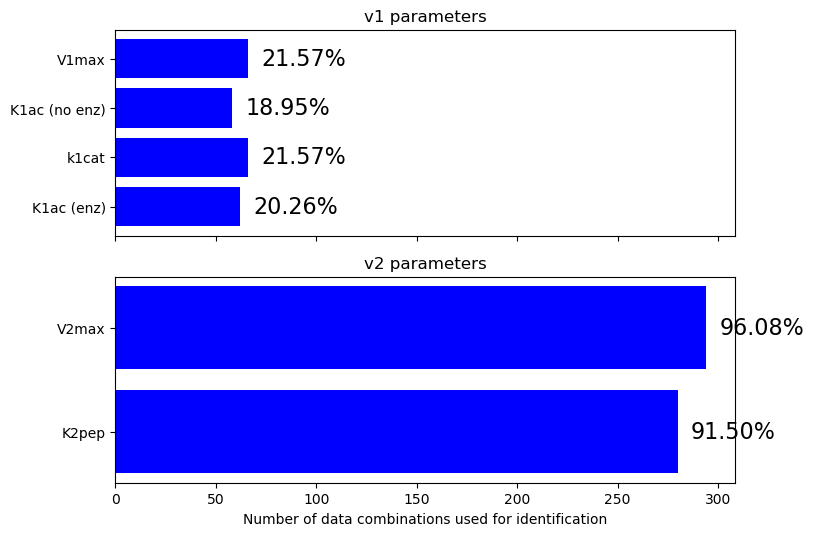

In [3]:
# plot parameter identifibaility for all fluxes using 2 data combinations
parameter_identifibaility_plot(max_parameter_2)

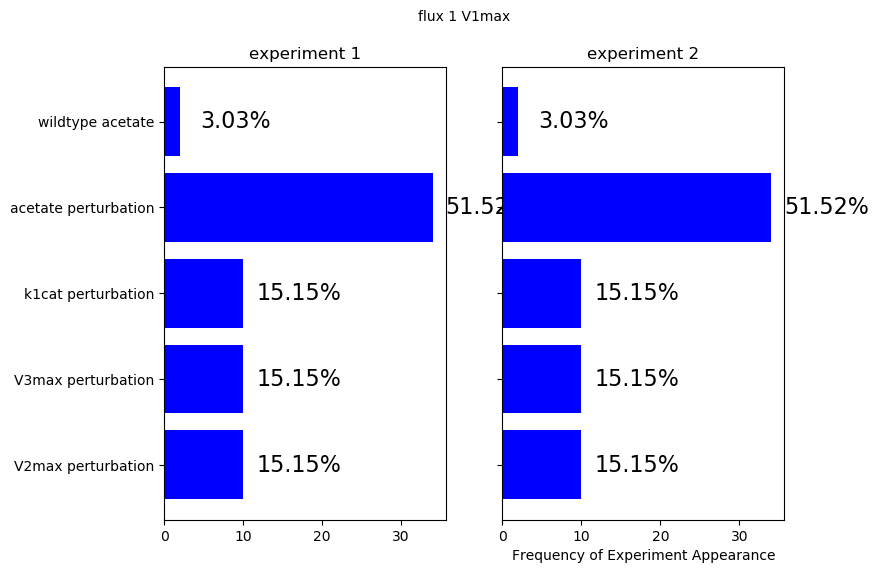

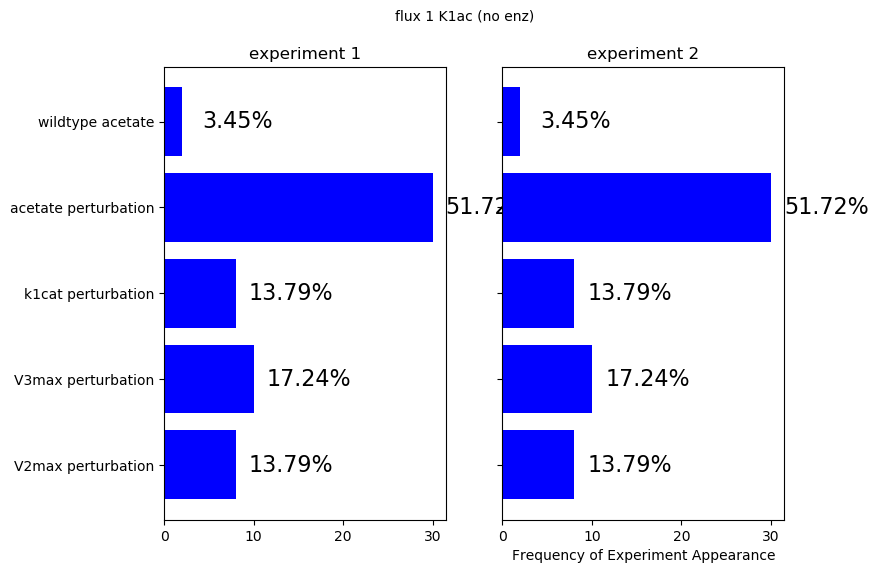

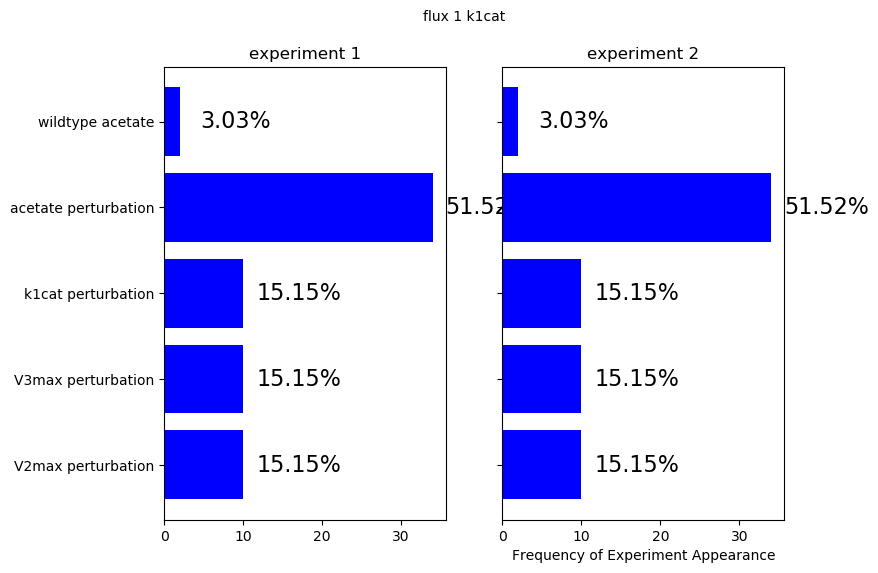

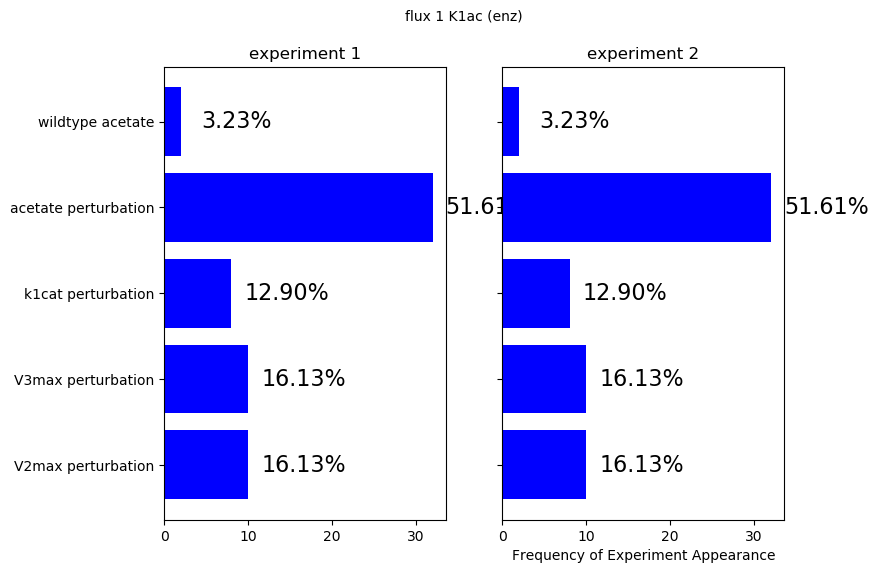

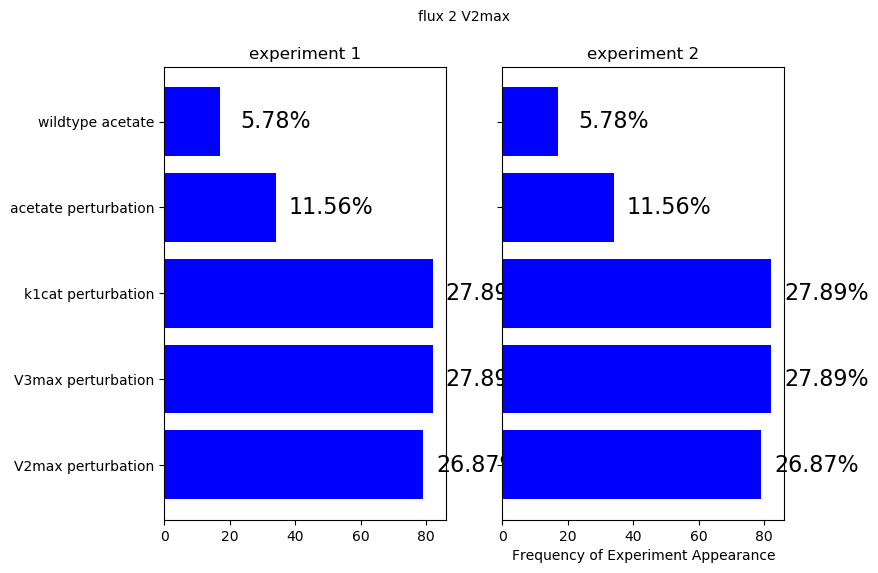

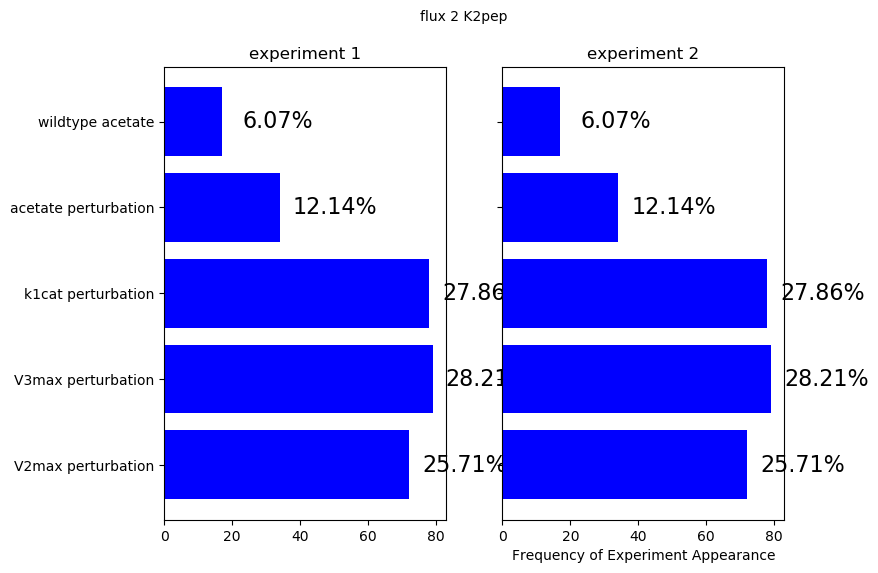

In [4]:
# plot experiment type in each position based on all parameter
# identifiable data combinations for each parameter
parameter_experiment_info_plot(experiment_info_2)

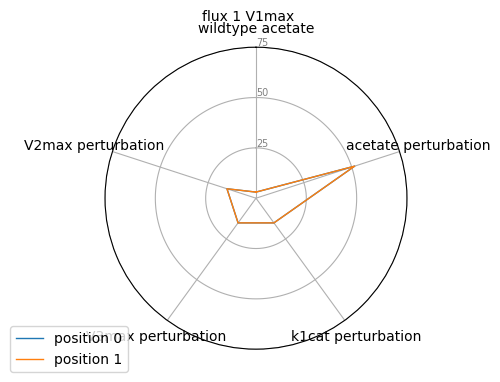

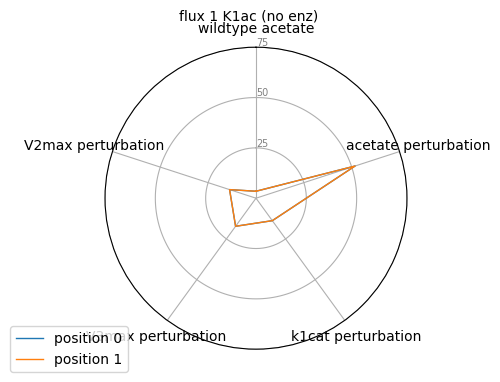

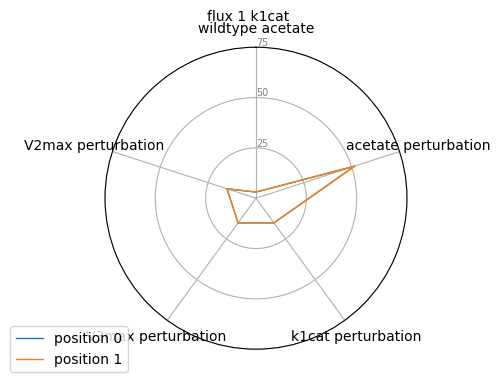

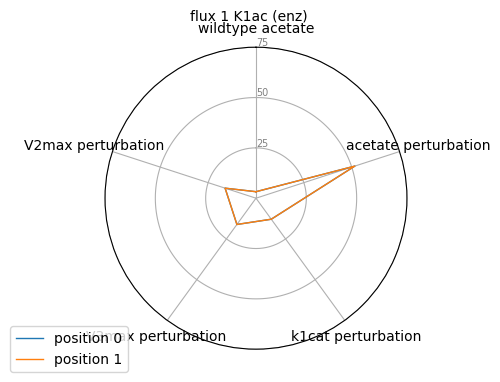

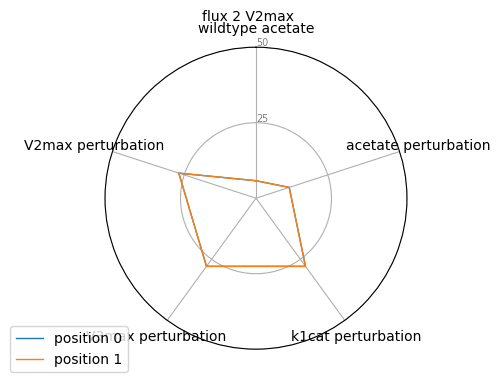

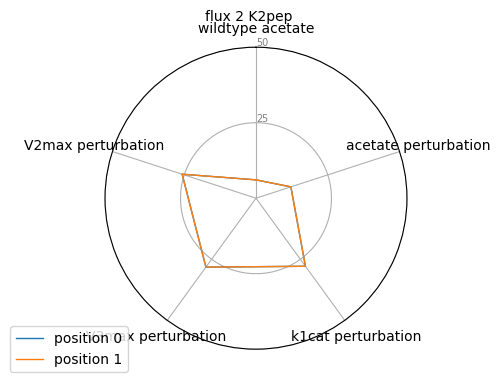

In [5]:
# spider plots for experiment type contrinution towards identifiable data sets
parameter_experiment_info_spider(experiment_info_2)

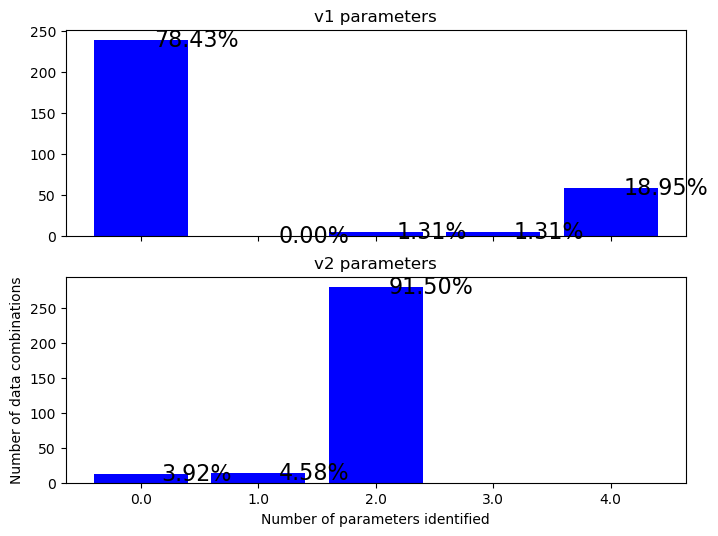

In [6]:
# plot utility of data sets (number of data sets identifying n, n-1, n-2, ...., 1, 0 parameters
data_utility_plot(data_list_2)

In [7]:
# get combination of 3 experiments and perform identifiability on all fluxes that require 3 data sets
print('Practical Identifiability Analysis of fluxes with 3 parameters \n')
choose_3 = range(0, 4896) # choose numbr of experimental datasets to use of analysis
# get combinations of experimental datasets
experimental_datasets_3_expts = \
    arrange_experimental_data(exp_xss, exp_fss, perturbation_details, 3, exp_flux_index, choose=choose_3)
ident_details_3 = flux_ident_3_data_combination(experimental_datasets_3_expts, choose=choose_3, flux_ids=[3])
print('Identifiability analysis for fluxes with 2 parameters complete.\n')
# data processing
data_list_3, max_parameter_3, experiment_info_3 = process_info_sample(ident_details_3,
                                                                      experimental_datasets_3_expts,
                                                                      experiment_type_indices,
                                                                      perturbation_details)

Practical Identifiability Analysis of fluxes with 3 parameters 

Identifiability for Dataset 1 of 4896: Original ID: 0

Identifiability for Dataset 2 of 4896: Original ID: 1

Identifiability for Dataset 3 of 4896: Original ID: 2

Identifiability for Dataset 4 of 4896: Original ID: 3

Identifiability for Dataset 5 of 4896: Original ID: 4

Identifiability for Dataset 6 of 4896: Original ID: 5

Identifiability for Dataset 7 of 4896: Original ID: 6

Identifiability for Dataset 8 of 4896: Original ID: 7

Identifiability for Dataset 9 of 4896: Original ID: 8

Identifiability for Dataset 10 of 4896: Original ID: 9

Identifiability for Dataset 11 of 4896: Original ID: 10

Identifiability for Dataset 12 of 4896: Original ID: 11

Identifiability for Dataset 13 of 4896: Original ID: 12

Identifiability for Dataset 14 of 4896: Original ID: 13

Identifiability for Dataset 15 of 4896: Original ID: 14

Identifiability for Dataset 16 of 4896: Original ID: 15

Identifiability for Dataset 17 of 4896: Or

kotte_model.py:203: RuntimeWarning: invalid value encountered in sqrt
  v31*v33*x12*x22*x23 + v31*v32*x13*x22*x23)) + \
kotte_model.py:210: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(sqrt_v3max_nr_1)))/\
kotte_model.py:273: RuntimeWarning: invalid value encountered in sqrt
  v31*v33*x12*x22*x23 + v31*v32*x13*x22*x23)) + \
kotte_model.py:280: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(sqrt_v3max_nr_2)))/\
kotte_model.py:343: RuntimeWarning: invalid value encountered in sqrt
  v31*v32*x13*x21*x23 - v31*v33*x12*x22*x23 + v31*v32*x13*x22*x23)) - \
kotte_model.py:350: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(sq_nr_1_k3fdp)))/ \
kotte_model.py:413: RuntimeWarning: invalid value encountered in sqrt
  v31*v33*x12*x22*x23 + v31*v32*x13*x22*x23)) - \
kotte_model.py:420: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(sq_k3fdp_nr_2)))/\
kotte_model.py:441: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(sq_k3pep_nr_1)
ko

Identifiability for Dataset 417 of 4896: Original ID: 416

Identifiability for Dataset 418 of 4896: Original ID: 417

Identifiability for Dataset 419 of 4896: Original ID: 418

Identifiability for Dataset 420 of 4896: Original ID: 419

Identifiability for Dataset 421 of 4896: Original ID: 420

Identifiability for Dataset 422 of 4896: Original ID: 421

Identifiability for Dataset 423 of 4896: Original ID: 422

Identifiability for Dataset 424 of 4896: Original ID: 423

Identifiability for Dataset 425 of 4896: Original ID: 424

Identifiability for Dataset 426 of 4896: Original ID: 425

Identifiability for Dataset 427 of 4896: Original ID: 426

Identifiability for Dataset 428 of 4896: Original ID: 427

Identifiability for Dataset 429 of 4896: Original ID: 428

Identifiability for Dataset 430 of 4896: Original ID: 429

Identifiability for Dataset 431 of 4896: Original ID: 430

Identifiability for Dataset 432 of 4896: Original ID: 431

Identifiability for Dataset 433 of 4896: Original ID: 43

Identifiability for Dataset 811 of 4896: Original ID: 810

Identifiability for Dataset 812 of 4896: Original ID: 811

Identifiability for Dataset 813 of 4896: Original ID: 812

Identifiability for Dataset 814 of 4896: Original ID: 813

Identifiability for Dataset 815 of 4896: Original ID: 814

Identifiability for Dataset 816 of 4896: Original ID: 815

Identifiability for Dataset 817 of 4896: Original ID: 816

Identifiability for Dataset 818 of 4896: Original ID: 817

Identifiability for Dataset 819 of 4896: Original ID: 818

Identifiability for Dataset 820 of 4896: Original ID: 819

Identifiability for Dataset 821 of 4896: Original ID: 820

Identifiability for Dataset 822 of 4896: Original ID: 821

Identifiability for Dataset 823 of 4896: Original ID: 822

Identifiability for Dataset 824 of 4896: Original ID: 823

Identifiability for Dataset 825 of 4896: Original ID: 824

Identifiability for Dataset 826 of 4896: Original ID: 825

Identifiability for Dataset 827 of 4896: Original ID: 82

Identifiability for Dataset 1241 of 4896: Original ID: 1240

Identifiability for Dataset 1242 of 4896: Original ID: 1241

Identifiability for Dataset 1243 of 4896: Original ID: 1242

Identifiability for Dataset 1244 of 4896: Original ID: 1243

Identifiability for Dataset 1245 of 4896: Original ID: 1244

Identifiability for Dataset 1246 of 4896: Original ID: 1245

Identifiability for Dataset 1247 of 4896: Original ID: 1246

Identifiability for Dataset 1248 of 4896: Original ID: 1247

Identifiability for Dataset 1249 of 4896: Original ID: 1248

Identifiability for Dataset 1250 of 4896: Original ID: 1249

Identifiability for Dataset 1251 of 4896: Original ID: 1250

Identifiability for Dataset 1252 of 4896: Original ID: 1251

Identifiability for Dataset 1253 of 4896: Original ID: 1252

Identifiability for Dataset 1254 of 4896: Original ID: 1253

Identifiability for Dataset 1255 of 4896: Original ID: 1254

Identifiability for Dataset 1256 of 4896: Original ID: 1255

Identifiability for Data

Identifiability for Dataset 1642 of 4896: Original ID: 1641

Identifiability for Dataset 1643 of 4896: Original ID: 1642

Identifiability for Dataset 1644 of 4896: Original ID: 1643

Identifiability for Dataset 1645 of 4896: Original ID: 1644

Identifiability for Dataset 1646 of 4896: Original ID: 1645

Identifiability for Dataset 1647 of 4896: Original ID: 1646

Identifiability for Dataset 1648 of 4896: Original ID: 1647

Identifiability for Dataset 1649 of 4896: Original ID: 1648

Identifiability for Dataset 1650 of 4896: Original ID: 1649

Identifiability for Dataset 1651 of 4896: Original ID: 1650

Identifiability for Dataset 1652 of 4896: Original ID: 1651

Identifiability for Dataset 1653 of 4896: Original ID: 1652

Identifiability for Dataset 1654 of 4896: Original ID: 1653

Identifiability for Dataset 1655 of 4896: Original ID: 1654

Identifiability for Dataset 1656 of 4896: Original ID: 1655

Identifiability for Dataset 1657 of 4896: Original ID: 1656

Identifiability for Data

Identifiability for Dataset 2039 of 4896: Original ID: 2038

Identifiability for Dataset 2040 of 4896: Original ID: 2039

Identifiability for Dataset 2041 of 4896: Original ID: 2040

Identifiability for Dataset 2042 of 4896: Original ID: 2041

Identifiability for Dataset 2043 of 4896: Original ID: 2042

Identifiability for Dataset 2044 of 4896: Original ID: 2043

Identifiability for Dataset 2045 of 4896: Original ID: 2044

Identifiability for Dataset 2046 of 4896: Original ID: 2045

Identifiability for Dataset 2047 of 4896: Original ID: 2046

Identifiability for Dataset 2048 of 4896: Original ID: 2047

Identifiability for Dataset 2049 of 4896: Original ID: 2048

Identifiability for Dataset 2050 of 4896: Original ID: 2049

Identifiability for Dataset 2051 of 4896: Original ID: 2050

Identifiability for Dataset 2052 of 4896: Original ID: 2051

Identifiability for Dataset 2053 of 4896: Original ID: 2052

Identifiability for Dataset 2054 of 4896: Original ID: 2053

Identifiability for Data

Identifiability for Dataset 2431 of 4896: Original ID: 2430

Identifiability for Dataset 2432 of 4896: Original ID: 2431

Identifiability for Dataset 2433 of 4896: Original ID: 2432

Identifiability for Dataset 2434 of 4896: Original ID: 2433

Identifiability for Dataset 2435 of 4896: Original ID: 2434

Identifiability for Dataset 2436 of 4896: Original ID: 2435

Identifiability for Dataset 2437 of 4896: Original ID: 2436

Identifiability for Dataset 2438 of 4896: Original ID: 2437

Identifiability for Dataset 2439 of 4896: Original ID: 2438

Identifiability for Dataset 2440 of 4896: Original ID: 2439

Identifiability for Dataset 2441 of 4896: Original ID: 2440

Identifiability for Dataset 2442 of 4896: Original ID: 2441

Identifiability for Dataset 2443 of 4896: Original ID: 2442

Identifiability for Dataset 2444 of 4896: Original ID: 2443

Identifiability for Dataset 2445 of 4896: Original ID: 2444

Identifiability for Dataset 2446 of 4896: Original ID: 2445

Identifiability for Data

Identifiability for Dataset 2859 of 4896: Original ID: 2858

Identifiability for Dataset 2860 of 4896: Original ID: 2859

Identifiability for Dataset 2861 of 4896: Original ID: 2860

Identifiability for Dataset 2862 of 4896: Original ID: 2861

Identifiability for Dataset 2863 of 4896: Original ID: 2862

Identifiability for Dataset 2864 of 4896: Original ID: 2863

Identifiability for Dataset 2865 of 4896: Original ID: 2864

Identifiability for Dataset 2866 of 4896: Original ID: 2865

Identifiability for Dataset 2867 of 4896: Original ID: 2866

Identifiability for Dataset 2868 of 4896: Original ID: 2867

Identifiability for Dataset 2869 of 4896: Original ID: 2868

Identifiability for Dataset 2870 of 4896: Original ID: 2869

Identifiability for Dataset 2871 of 4896: Original ID: 2870

Identifiability for Dataset 2872 of 4896: Original ID: 2871

Identifiability for Dataset 2873 of 4896: Original ID: 2872

Identifiability for Dataset 2874 of 4896: Original ID: 2873

Identifiability for Data

Identifiability for Dataset 3294 of 4896: Original ID: 3293

Identifiability for Dataset 3295 of 4896: Original ID: 3294

Identifiability for Dataset 3296 of 4896: Original ID: 3295

Identifiability for Dataset 3297 of 4896: Original ID: 3296

Identifiability for Dataset 3298 of 4896: Original ID: 3297

Identifiability for Dataset 3299 of 4896: Original ID: 3298

Identifiability for Dataset 3300 of 4896: Original ID: 3299

Identifiability for Dataset 3301 of 4896: Original ID: 3300

Identifiability for Dataset 3302 of 4896: Original ID: 3301

Identifiability for Dataset 3303 of 4896: Original ID: 3302

Identifiability for Dataset 3304 of 4896: Original ID: 3303

Identifiability for Dataset 3305 of 4896: Original ID: 3304

Identifiability for Dataset 3306 of 4896: Original ID: 3305

Identifiability for Dataset 3307 of 4896: Original ID: 3306

Identifiability for Dataset 3308 of 4896: Original ID: 3307

Identifiability for Dataset 3309 of 4896: Original ID: 3308

Identifiability for Data

Identifiability for Dataset 3700 of 4896: Original ID: 3699

Identifiability for Dataset 3701 of 4896: Original ID: 3700

Identifiability for Dataset 3702 of 4896: Original ID: 3701

Identifiability for Dataset 3703 of 4896: Original ID: 3702

Identifiability for Dataset 3704 of 4896: Original ID: 3703

Identifiability for Dataset 3705 of 4896: Original ID: 3704

Identifiability for Dataset 3706 of 4896: Original ID: 3705

Identifiability for Dataset 3707 of 4896: Original ID: 3706

Identifiability for Dataset 3708 of 4896: Original ID: 3707

Identifiability for Dataset 3709 of 4896: Original ID: 3708

Identifiability for Dataset 3710 of 4896: Original ID: 3709

Identifiability for Dataset 3711 of 4896: Original ID: 3710

Identifiability for Dataset 3712 of 4896: Original ID: 3711

Identifiability for Dataset 3713 of 4896: Original ID: 3712

Identifiability for Dataset 3714 of 4896: Original ID: 3713

Identifiability for Dataset 3715 of 4896: Original ID: 3714

Identifiability for Data

Identifiability for Dataset 4099 of 4896: Original ID: 4098

Identifiability for Dataset 4100 of 4896: Original ID: 4099

Identifiability for Dataset 4101 of 4896: Original ID: 4100

Identifiability for Dataset 4102 of 4896: Original ID: 4101

Identifiability for Dataset 4103 of 4896: Original ID: 4102

Identifiability for Dataset 4104 of 4896: Original ID: 4103

Identifiability for Dataset 4105 of 4896: Original ID: 4104

Identifiability for Dataset 4106 of 4896: Original ID: 4105

Identifiability for Dataset 4107 of 4896: Original ID: 4106

Identifiability for Dataset 4108 of 4896: Original ID: 4107

Identifiability for Dataset 4109 of 4896: Original ID: 4108

Identifiability for Dataset 4110 of 4896: Original ID: 4109

Identifiability for Dataset 4111 of 4896: Original ID: 4110

Identifiability for Dataset 4112 of 4896: Original ID: 4111

Identifiability for Dataset 4113 of 4896: Original ID: 4112

Identifiability for Dataset 4114 of 4896: Original ID: 4113

Identifiability for Data

Identifiability for Dataset 4528 of 4896: Original ID: 4527

Identifiability for Dataset 4529 of 4896: Original ID: 4528

Identifiability for Dataset 4530 of 4896: Original ID: 4529

Identifiability for Dataset 4531 of 4896: Original ID: 4530

Identifiability for Dataset 4532 of 4896: Original ID: 4531

Identifiability for Dataset 4533 of 4896: Original ID: 4532

Identifiability for Dataset 4534 of 4896: Original ID: 4533

Identifiability for Dataset 4535 of 4896: Original ID: 4534

Identifiability for Dataset 4536 of 4896: Original ID: 4535

Identifiability for Dataset 4537 of 4896: Original ID: 4536

Identifiability for Dataset 4538 of 4896: Original ID: 4537

Identifiability for Dataset 4539 of 4896: Original ID: 4538

Identifiability for Dataset 4540 of 4896: Original ID: 4539

Identifiability for Dataset 4541 of 4896: Original ID: 4540

Identifiability for Dataset 4542 of 4896: Original ID: 4541

Identifiability for Dataset 4543 of 4896: Original ID: 4542

Identifiability for Data

Identifiability analysis for fluxes with 2 parameters complete.

Process information From Identifiability Analysis.....

Processing identifiability data for sample 1 of 1
Processing identifiability for flux 1 of 1
Original Data sets that can detect 6 parameters: 228
Original Data sets that can detect 5 parameters: 228
Original Data sets that can detect 4 parameters: 1002
Original Data sets that can detect 3 parameters: 1236
Original Data sets that can detect 2 parameters: 1764
Original Data sets that can detect 1 parameters: 144
Original Data sets that can detect 0 parameters: 294
Information Processing Complete for flux 1 

Getting experiments identifying parameters in flux 1 of 1
Experiment types for parameter 1 of 6
Experiment type frequencies in position 1 of 3:
Frequency for type 0 of 5: 232 of 3738 data combinations
Frequency for type 1 of 5: 421 of 3738 data combinations
Frequency for type 2 of 5: 1008 of 3738 data combinations
Frequency for type 3 of 5: 1047 of 3738 data combin

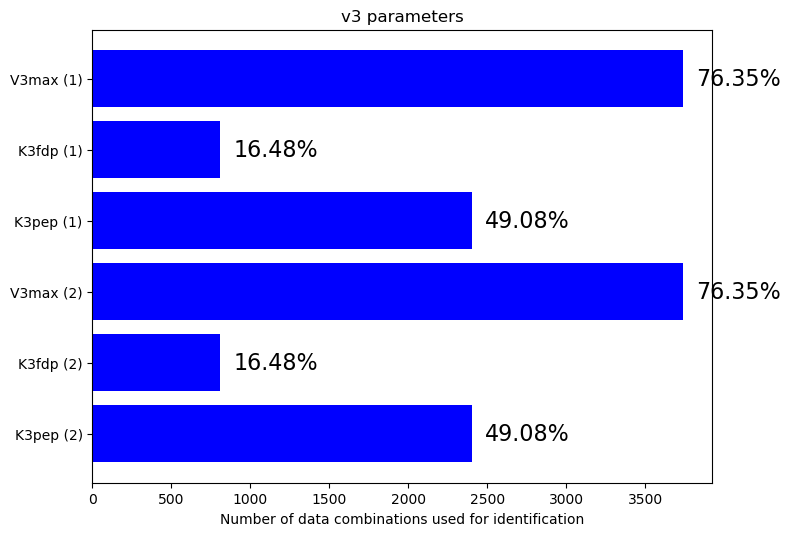

In [8]:
# plot parameter identifibaility for all fluxes using 3 data combinations
parameter_identifibaility_plot(max_parameter_3)

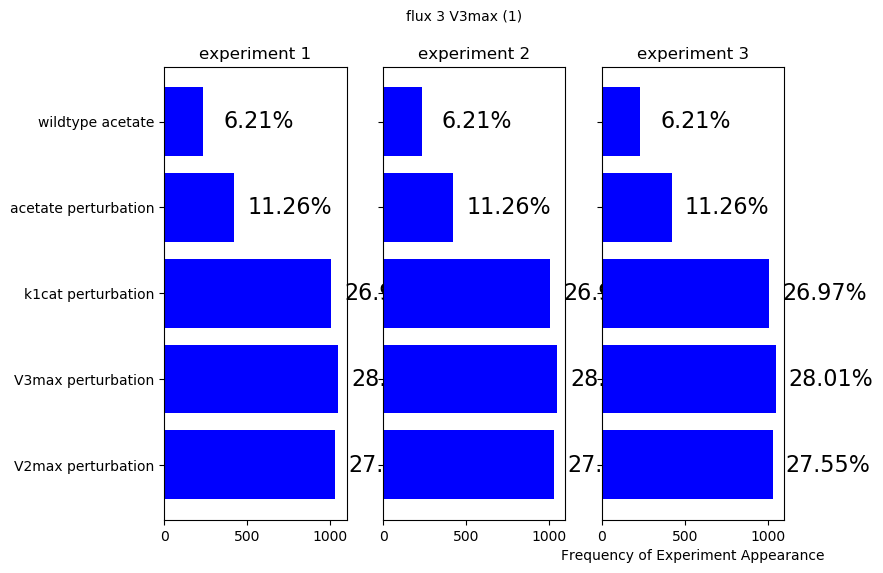

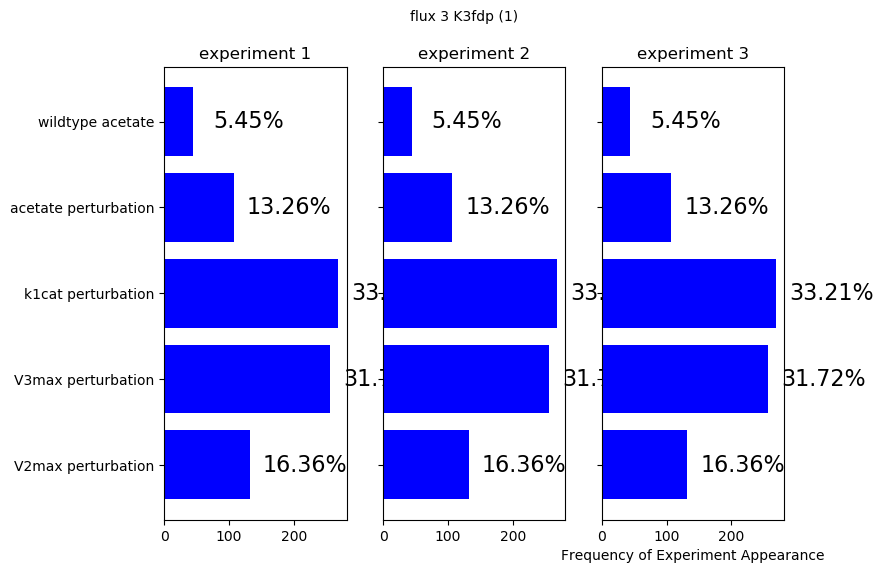

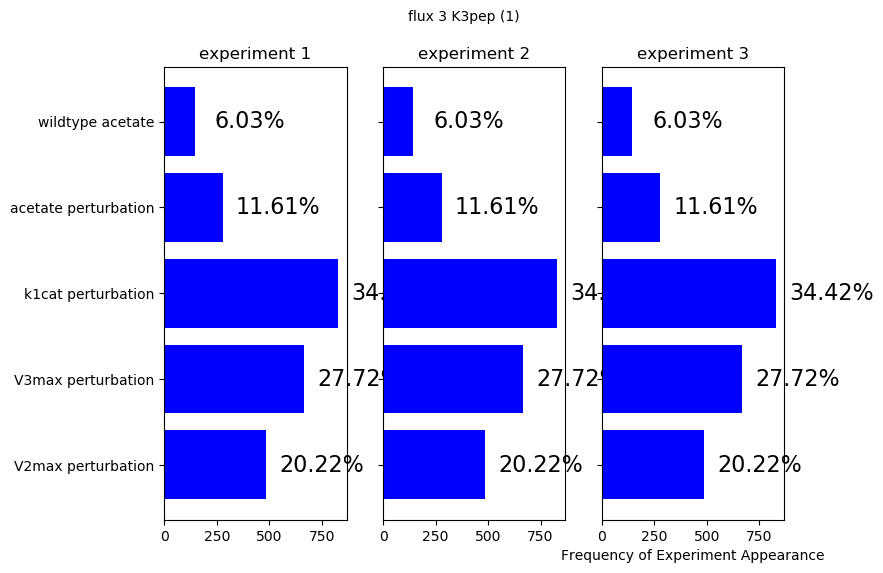

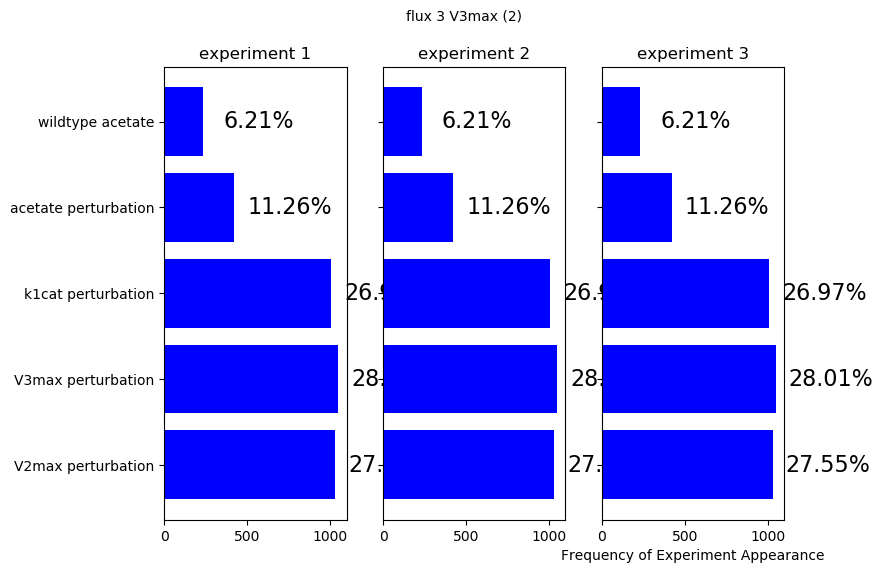

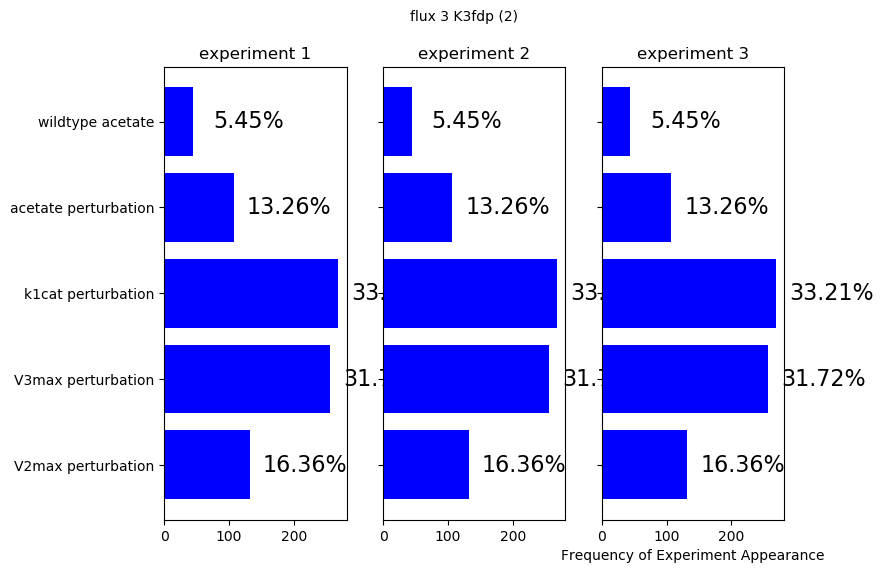

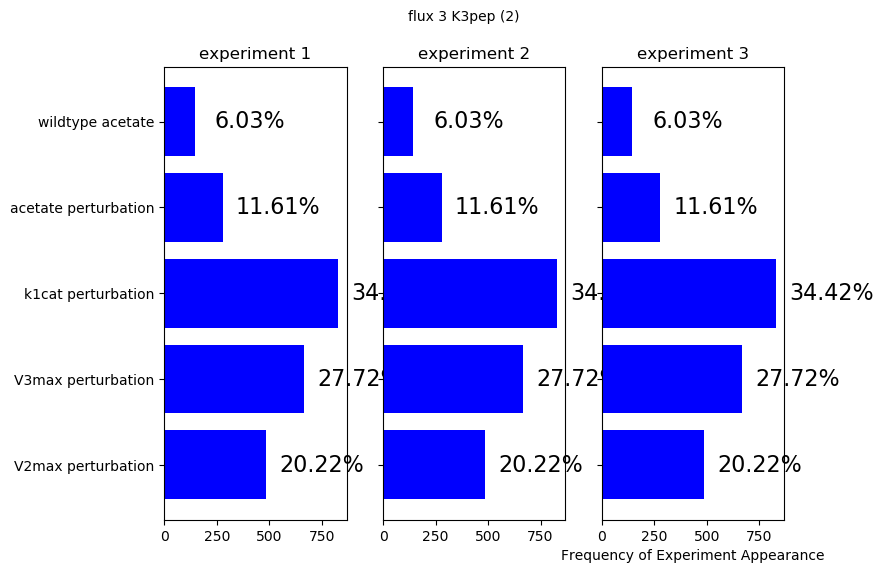

In [9]:
# plot experiment type in each position based on all parameter
# identifiable data combinations for each parameter
parameter_experiment_info_plot(experiment_info_3)

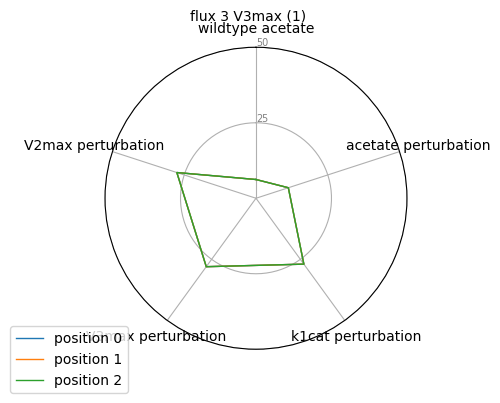

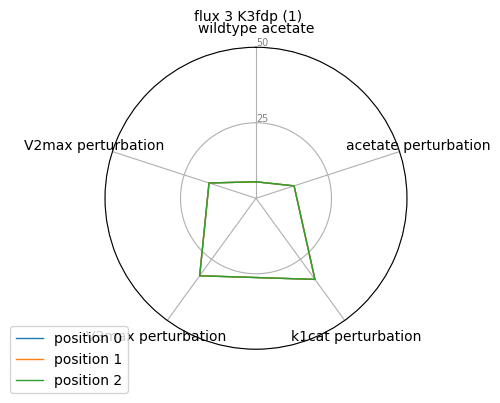

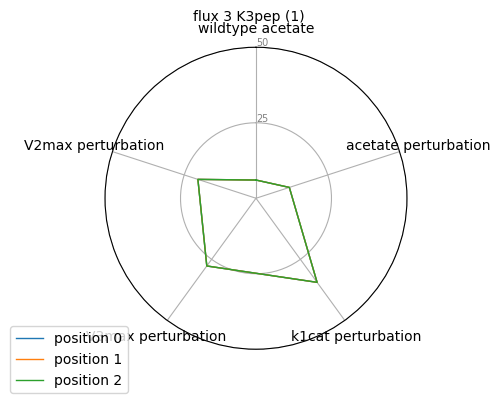

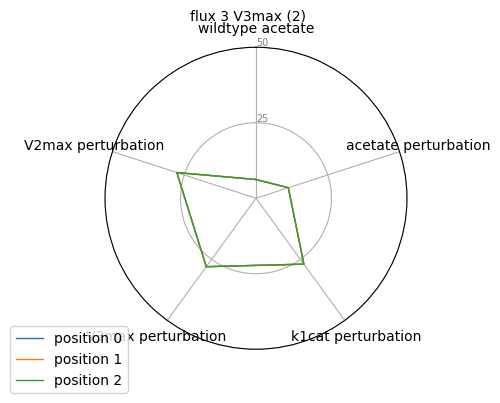

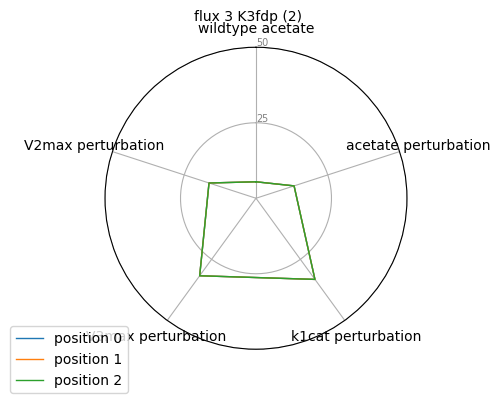

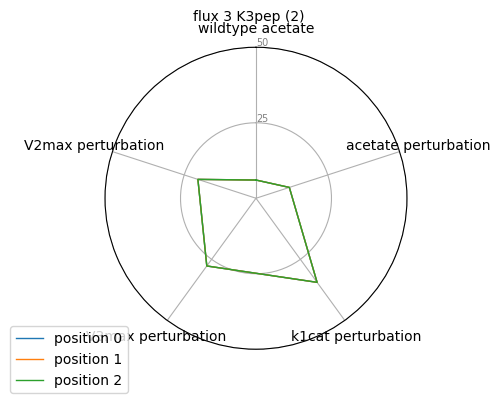

In [10]:
# spider plots for experiment type contrinution towards identifiable data sets
parameter_experiment_info_spider(experiment_info_3)

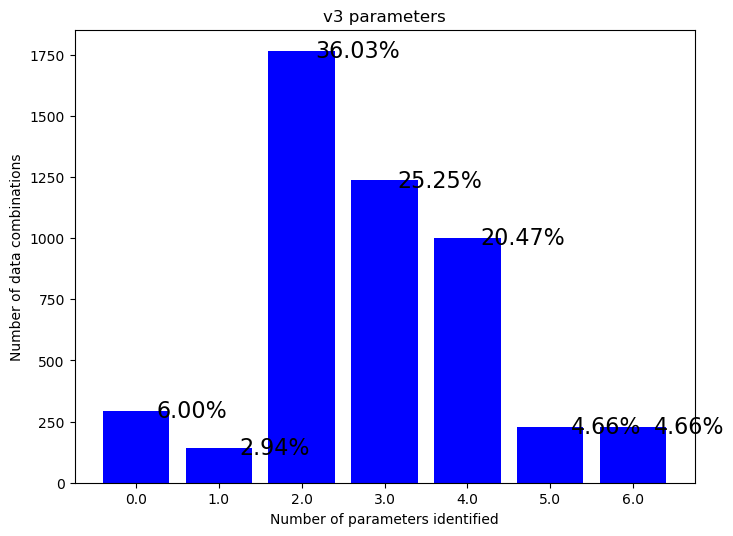

In [11]:
# plot utility of data sets (number of data sets identifying n, n-1, n-2, ...., 1, 0 parameters
data_utility_plot(data_list_3)